In [7]:
# Making Imports
import pandas as pd
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
import numpy as np

In [98]:
#Declaring the data
data = {
    'Price' : [300 , 200 , 500 , 400, 600 , 800,700, 100 ],
    'Doors' : [4,2,4,4,2,2,4,2],
    'Mileage': [30,20,50,40,60,80,70,100],
    'Cylinder': [3,2,5,4,6,8,7,10]
}

In [99]:
#Printing the data declared
print(data)

{'Price': [300, 200, 500, 400, 600, 800, 700, 100],
 'Doors': [4, 2, 4, 4, 2, 2, 4, 2],
 'Mileage': [30, 20, 50, 40, 60, 80, 70, 100],
 'Cylinder': [3, 2, 5, 4, 6, 8, 7, 10]}

In [100]:
#Converting the data to a dataframe object
df = pd.DataFrame(data)

In [101]:
#Confirming the dataframe object
df

,Price,Doors,Mileage,Cylinder
0,300,4,30,3
1,200,2,20,2
2,500,4,50,5
3,400,4,40,4
4,600,2,60,6
5,800,2,80,8
6,700,4,70,7
7,100,2,100,10


In [102]:
#Playing with the data object
df.head()

,Price,Doors,Mileage,Cylinder
0,300,4,30,3
1,200,2,20,2
2,500,4,50,5
3,400,4,40,4
4,600,2,60,6


In [131]:
#Creating a range array using numpy
bins = np.arange(100,900,100)

In [132]:
#Confirming the array object created
bins

array([100, 200, 300, 400, 500, 600, 700, 800])

In [133]:
#grouping the price with the array created with numpy and getting the mean of other attribuest which falls in that price range
grouped = df.groupby(pd.cut(df['Price'], bins)).mean()

In [135]:
#Getting the first 7 elements in the dataframe object
grouped.head(7)

,Price,Doors,Mileage,Cylinder
Price,,,,
"(100, 200]",200.0,2.0,20.0,2.0
"(200, 300]",300.0,4.0,30.0,3.0
"(300, 400]",400.0,4.0,40.0,4.0
"(400, 500]",500.0,4.0,50.0,5.0
"(500, 600]",600.0,2.0,60.0,6.0
"(600, 700]",700.0,4.0,70.0,7.0
"(700, 800]",800.0,2.0,80.0,8.0


<Axes: xlabel='Price'>

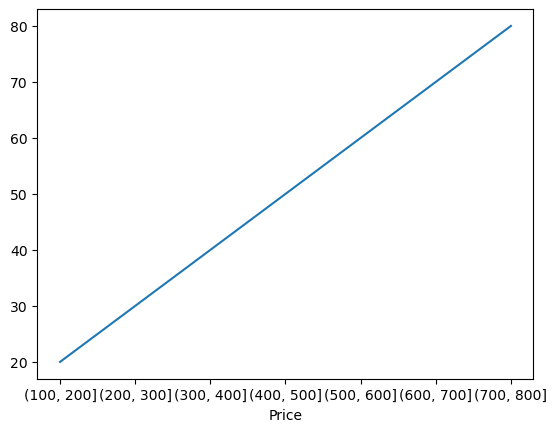

In [137]:
#plotting a line graph to show the correlation or relationship between Price and Mileage
grouped['Mileage'].plot.line()

In [108]:
#Extracting the three attributes from the dataframe
X = df[['Doors','Mileage','Cylinder']]

In [109]:
# Confirming the extracted data
X

,Doors,Mileage,Cylinder
0,4,30,3
1,2,20,2
2,4,50,5
3,4,40,4
4,2,60,6
5,2,80,8
6,4,70,7
7,2,100,10


In [110]:
# Extracting the Price from the dataframe
Y = df['Price']

In [111]:
#confirming the extracted Price from the dataframe
Y

0    300
1    200
2    500
3    400
4    600
5    800
6    700
7    100
Name: Price, dtype: int64

In [112]:
# Instansiating the StandardScaler class
scale = StandardScaler()

In [113]:
# normalizing and Standardizing the values of the attribute in X for a non biased prddiction from the model
X[['Doors','Mileage','Cylinder']] = scale.fit_transform(X[['Doors','Mileage','Cylinder']].values)

C:\Users\utibe\AppData\Local\Temp\ipykernel_4760\2874098237.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Doors','Mileage','Cylinder']] = scale.fit_transform(X[['Doors','Mileage','Cylinder']].values)


In [114]:
#Confirming the new data
X[['Doors','Mileage','Cylinder']]

,Doors,Mileage,Cylinder
0,1.0,-1.051315,-1.051315
1,-1.0,-1.451816,-1.451816
2,1.0,-0.250313,-0.250313
3,1.0,-0.650814,-0.650814
4,-1.0,0.150188,0.150188
5,-1.0,0.951190,0.951190
6,1.0,0.550689,0.550689
7,-1.0,1.752192,1.752192


In [115]:
# Adding a constant or a form of interceptor for better training of the model which is 1
X = sm.add_constant(X)

In [116]:
#new value of X
X

,const,Doors,Mileage,Cylinder
0,1.0,1.0,-1.051315,-1.051315
1,1.0,-1.0,-1.451816,-1.451816
2,1.0,1.0,-0.250313,-0.250313
3,1.0,1.0,-0.650814,-0.650814
4,1.0,-1.0,0.150188,0.150188
5,1.0,-1.0,0.951190,0.951190
6,1.0,1.0,0.550689,0.550689
7,1.0,-1.0,1.752192,1.752192


In [117]:
#Training the model
model = sm.OLS(Y,X).fit()

In [118]:
#Printing the summary of the trained model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.094
Model:                            OLS   Adj. R-squared:                 -0.269
Method:                 Least Squares   F-statistic:                    0.2581
Date:                Wed, 13 Nov 2024   Prob (F-statistic):              0.782
Time:                        02:03:45   Log-Likelihood:                -54.433
No. Observations:                   8   AIC:                             114.9
Df Residuals:                       5   BIC:                             115.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        450.0000     97.558      4.613      0.0

C:\Users\utibe\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=8
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [127]:
#Testing the model with new data and also standardizing the normalizing the new data
y =scale.transform([[4,40,10]])
print(y)

[[ 1.         -0.65081403  1.75219161]]


In [128]:
#Inserting a constant 1 to the data
y = np.insert(y[0],0, 1)

In [129]:
#Confirming the value
y

array([ 1.        ,  1.        , -0.65081403,  1.75219161])

In [130]:
#Predicting with the model
predicted = model.predict(y)
print(predicted)

[538.]
